In [1]:
from pyspark import SparkContext
from pyspark.sql import SparkSession

sc = SparkContext.getOrCreate()
ss = SparkSession.builder.config('spark.sql.pivotMaxValues', '999999').getOrCreate()

In [3]:
def convert_rating(row):
    row[2] = float(row[2])
    return row

path = '/Users/shijialiang/data/amazon/rating_BookElectronics.csv'
books_data = sc.textFile(path).map(lambda x: x.split(',')).map(lambda x: convert_rating(x)).cache()

In [10]:
from pyspark.sql.types import *
schema = StructType([StructField("user", StringType(), False),
                      StructField("item", StringType(), False),
                      StructField("rating", FloatType(), False),
                      StructField("time", StringType(), True)
                    ])
books_df = ss.createDataFrame(books_data, schema).cache()

In [11]:
books_df.write.saveAsTable('books')

In [14]:
ss.sql('select * from books').count()

30331635

In [15]:
books_df.show(5)

+--------------+----------+------+----------+
|          user|      item|rating|      time|
+--------------+----------+------+----------+
|A2IIIDRK3PRRZY|0000000116|   1.0|1395619200|
|A1TADCM7YWPQ8M|0000000868|   4.0|1031702400|
| AWGH7V0BDOJKB|0000013714|   4.0|1383177600|
|A3UTQPQPM4TQO0|0000013714|   5.0|1374883200|
| A8ZS0I5L5V31B|0000013714|   5.0|1393632000|
+--------------+----------+------+----------+
only showing top 5 rows



In [23]:
userNum_bookCount = ss.sql('select user_num, count(*) as book_count\
                            from (select item, count(user) as user_num from books group by item)\
                            group by user_num order by user_num').collect()

In [78]:
bookNum_userCount = ss.sql('select item_num, count(*) as user_count\
                            from (select user, count(item) as item_num from books group by user)\
                            group by item_num order by item_num').collect()

In [98]:
import matplotlib.pyplot as plt
from math import log

userNum = [x[0] for x in userNum_bookCount]
log_bookCount = [log(x[1]) for x in userNum_bookCount]

bookNum = [x[0] for x in bookNum_userCount]
log_userCount = [log(x[1]) for x in bookNum_userCount]

(0, 1000)

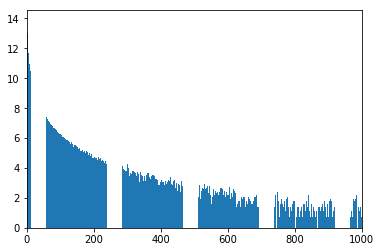

In [114]:
plt.bar(userNum, log_bookCount)
plt.xlim(0, 1000)

(0, 1000)

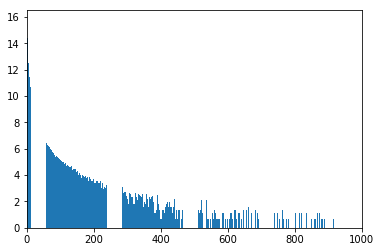

In [115]:
plt.bar(bookNum, log_userCount)
plt.xlim(0, 1000)
